<SBML: test_3>
<roadrunner.RoadRunner() { 
'this' : 0x416d120
'modelLoaded' : true
'modelName' : test_3
'libSBMLVersion' : LibSBML Version: 5.11.0
'jacobianStepSize' : 1e-05
'conservedMoietyAnalysis' : false
'simulateOptions' : 
< roadrunner.SimulateOptions() 
{ 
'this' : 0x46f9f20, 
'reset' : 0,
'structuredResult' : 0,
'copyResult' : 1,
'steps' : 50,
'start' : 0,
'duration' : 10
}>, 
'integrator' : 
< roadrunner.Integrator() >

}>
--------------------------------------------------------------------------------
cvode
('relative_tolerance', ':', 1e-06)
('absolute_tolerance', ':', 1.5624999999999998e-20)
('stiff', ':', True)
('maximum_bdf_order', ':', 5)
('maximum_adams_order', ':', 12)
('maximum_num_steps', ':', 20000)
('maximum_time_step', ':', 0.0)
('minimum_time_step', ':', 0.0)
('initial_time_step', ':', 0.0)
('multiple_steps', ':', False)
('variable_step_size', ':', False)


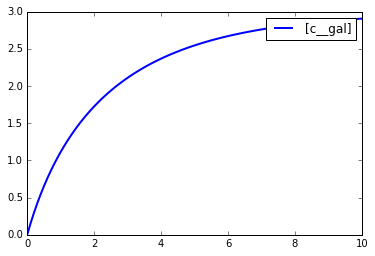

In [18]:
%matplotlib inline

# Simulating simple test model
import roadrunner

from simapp.models import CompModel
mtest = CompModel.objects.get(model_id="test_3")
print(mtest)
r = roadrunner.RoadRunner(mtest.filepath)
# r = roadrunner.RoadRunner("test_3.xml")

# settings
absTol = 1E-6
relTol = 1E-6
absTol = absTol * min(r.model.getCompartmentVolumes())  # absTol relative to the amounts
integrator = r.getIntegrator()
integrator.setValue('stiff', True)
integrator.setValue('absolute_tolerance', absTol)
integrator.setValue('relative_tolerance', relTol)

# integrate
r.simulate(0,10, 100)
print(r)
print('-'*80)
integrator = r.getIntegrator()
print(integrator.getName())
for key in integrator.getSettings():
    print(key, ':', integrator.getValue(key))
# plot
r.plot()

# => does not simulate, despite the steps default setting of 50 ????

# setting the steps explcitely is working
# r.simulate(0,10, 100)
# r.simulate(0,10, steps=100)

# Change parameters

In [58]:
# load model
r = roadrunner.RoadRunner("test_3.xml")
r.reset(SelectionRecord.ALL)  # full reset (parameters and concentrations)

# make a concentration backup (needed later)
concentration_backup = dict()
for sid in r.model.getFloatingSpeciesIds():
    concentration_backup[sid] = r["[{}]".format(sid)]

# initial state
print(r.x_cell, r.Vol_c, r['[c__gal]'])

(2.5e-05, 1.5625e-14, 0.00012)


In [59]:
# change parameter 
# -> the depending inital assignments are not updated (makes sense, are only initial)
r.x_cell = 10E-6  # [m]
print(r.x_cell, r.Vol_c, r['[c__gal]'])

(1e-05, 1.5625e-14, 0.00012)


In [60]:
# force an update via recalculating depending assignments
# -> Volume is updated, but also the concentrations due to changes in volume !
from roadrunner import SelectionRecord
r.reset(SelectionRecord.INITIAL_GLOBAL_PARAMETER)
print(r.x_cell, r.Vol_c, r['[c__gal]'])

(1e-05, 1.0000000000000003e-15, 0.0018749999999999995)


In [62]:
# a reset of the initial concentrations does not bring the concentrations back
r.reset()  # only reset initial concentrations
print(r.x_cell, r.Vol_c, r['[c__gal]'])

r.reset(SelectionRecord.INITIAL_FLOATING_CONCENTRATION)  # only reset initial concentrations
print(r.x_cell, r.Vol_c, r['[c__gal]'])

# the backup of the concentrations is needed
# restore concentrations
# -> now same initial concentrations under changed parameters
for key, value in concentration_backup.iteritems():
    r.model['[{}]'.format(key)] = value
print(r.x_cell, r.Vol_c, r['[c__gal]'])

(1e-05, 1.0000000000000003e-15, 0.0018749999999999995)
(1e-05, 1.0000000000000003e-15, 0.0018749999999999995)
(1e-05, 1.0000000000000003e-15, 0.00012)


In [51]:
# To reset all use
r.reset(SelectionRecord.ALL)  # full reset (parameters and concentrations)
print(r.x_cell, r.Vol_c, r['[c__gal]'])

(2.5e-05, 1.5625e-14, 0.00012)


In [65]:
# load model
r = roadrunner.RoadRunner("test_3.xml")
r.reset(SelectionRecord.ALL)  # full reset (parameters and concentrations)

# make a concentration backup (needed later)
concentration_backup = dict()
for sid in r.model.getFloatingSpeciesIds():
    concentration_backup[sid] = r["[{}]".format(sid)]

# initial state
print(r.x_cell, r.Vol_c, r['[c__gal]'])

# change parameter 
# -> the depending inital assignments are not updated (makes sense, are only initial)
r.x_cell = 10E-6  # [m]
print(r.x_cell, r.Vol_c, r['[c__gal]'])

# force an update via recalculating depending assignments
# -> Volume is updated, but also the concentrations due to changes in volume !
from roadrunner import SelectionRecord
r.reset(SelectionRecord.INITIAL_GLOBAL_PARAMETER)
print(r.x_cell, r.Vol_c, r['[c__gal]'])

# a reset of the initial concentrations does not bring the concentrations back
r.reset() 
print(r.x_cell, r.Vol_c, r['[c__gal]'])
r.reset(SelectionRecord.INITIAL_FLOATING_CONCENTRATION) 
print(r.x_cell, r.Vol_c, r['[c__gal]'])

# restore concentrations
# the backup of the concentrations is needed because the above things do not work
# -> now same initial concentrations under changed parameters
for key, value in concentration_backup.iteritems():
    r.model['[{}]'.format(key)] = value
print(r.x_cell, r.Vol_c, r['[c__gal]'])

# To reset all use
r.reset(SelectionRecord.ALL)  # full reset (parameters and concentrations)
print(r.x_cell, r.Vol_c, r['[c__gal]'])

(2.5e-05, 1.5625e-14, 0.00012)
(1e-05, 1.5625e-14, 0.00012)
(1e-05, 1.0000000000000003e-15, 0.0018749999999999995)
(1e-05, 1.0000000000000003e-15, 0.0018749999999999995)
(1e-05, 1.0000000000000003e-15, 0.0018749999999999995)
(1e-05, 1.0000000000000003e-15, 0.00012)
(2.5e-05, 1.5625e-14, 0.00012)


In [ ]:
SelectionRecord.